# Exploration des Données - Prix des Maisons d'Ames, Iowa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

## 1. CHARGEMENT ET APERÇU INITIAL DES DONNÉES

In [2]:
# Chargement des données
df = pd.read_csv('train.csv')

print("="*60)
print("APERÇU GÉNÉRAL DU DATASET")
print("="*60)
print(f"Dimensions du dataset: {df.shape}")
print(f"Nombre total de cellules: {df.shape[0] * df.shape[1]:,}")
print()

# Informations générales
print("INFORMATIONS GÉNÉRALES:")
print("-" * 30)
df.info()
print()

# Aperçu des premières lignes
print("APERÇU DES DONNÉES:")
print("-" * 30)
print(df.head())
print()

# Statistiques descriptives de base
print("STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES:")
print("-" * 50)
print(df.describe())

APERÇU GÉNÉRAL DU DATASET
Dimensions du dataset: (1460, 81)
Nombre total de cellules: 118,260

INFORMATIONS GÉNÉRALES:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   obj

## 2. ANALYSE DES DONNÉES MANQUANTES


ANALYSE DES DONNÉES MANQUANTES
Nombre de colonnes avec des valeurs manquantes: 19

Colonnes avec le plus de valeurs manquantes:
       Colonnes  Valeurs_Manquantes  Pourcentage
72       PoolQC                1453    99.520548
74  MiscFeature                1406    96.301370
6         Alley                1369    93.767123
73        Fence                1179    80.753425
25   MasVnrType                 872    59.726027
57  FireplaceQu                 690    47.260274
3   LotFrontage                 259    17.739726
59  GarageYrBlt                  81     5.547945
64   GarageCond                  81     5.547945
58   GarageType                  81     5.547945


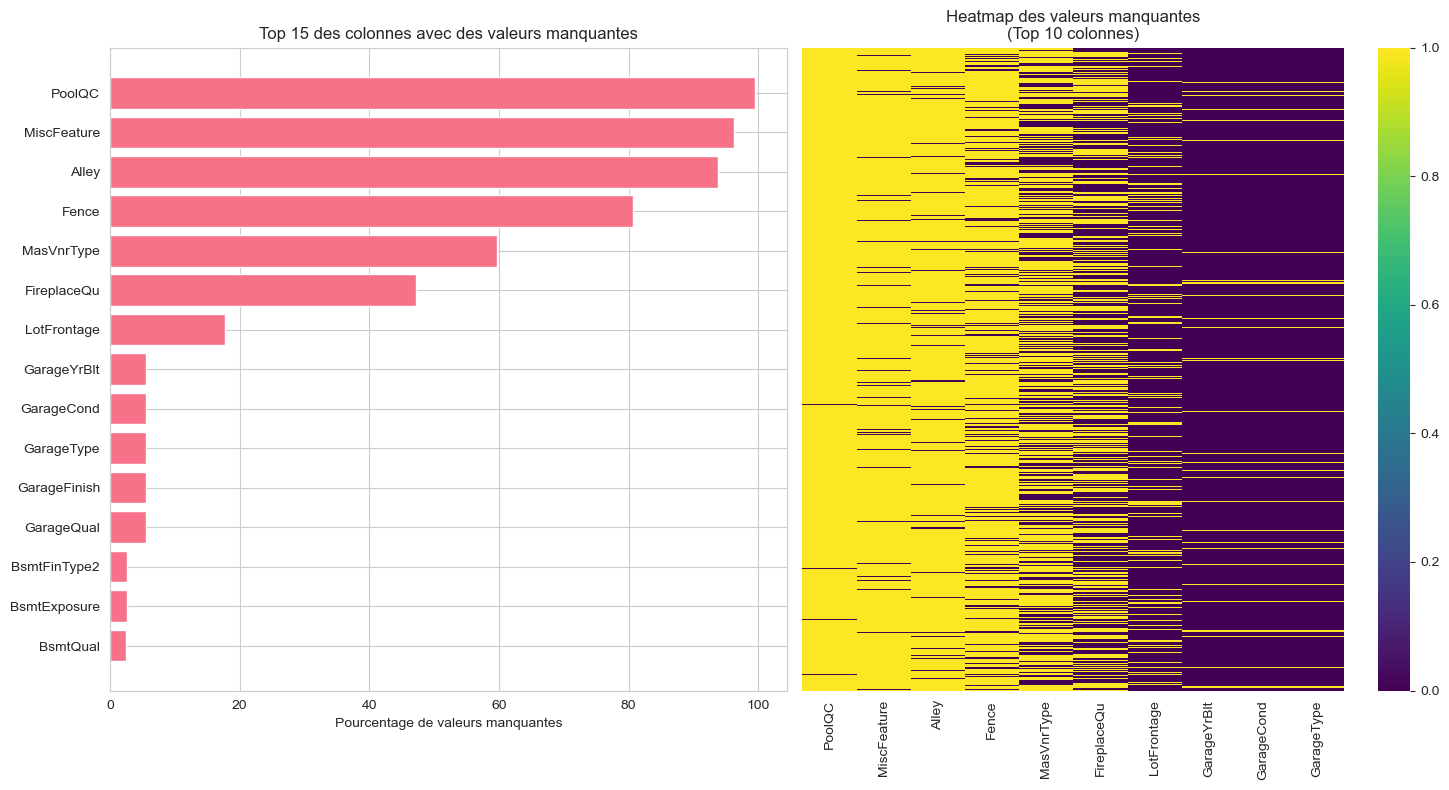

In [3]:
print("\n" + "="*60)
print("ANALYSE DES DONNÉES MANQUANTES")
print("="*60)

# Calcul des valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonnes': missing_data.index,
    'Valeurs_Manquantes': missing_data.values,
    'Pourcentage': missing_percent.values
}).sort_values('Pourcentage', ascending=False)

# Affichage des colonnes avec des valeurs manquantes
missing_cols = missing_df[missing_df['Valeurs_Manquantes'] > 0]
print(f"Nombre de colonnes avec des valeurs manquantes: {len(missing_cols)}")
print("\nColonnes avec le plus de valeurs manquantes:")
print(missing_cols.head(10))

# Visualisation des données manquantes
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
missing_cols_top = missing_cols.head(15)
plt.barh(missing_cols_top['Colonnes'], missing_cols_top['Pourcentage'])
plt.xlabel('Pourcentage de valeurs manquantes')
plt.title('Top 15 des colonnes avec des valeurs manquantes')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
# Heatmap des valeurs manquantes (échantillon)
sample_cols = missing_cols.head(10)['Colonnes'].tolist()
if sample_cols:
    sns.heatmap(df[sample_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Heatmap des valeurs manquantes\n(Top 10 colonnes)')
plt.tight_layout()
plt.show()

## 3. ANALYSE DE LA VARIABLE CIBLE (SALEPRICE)


ANALYSE DE LA VARIABLE CIBLE - SALEPRICE
STATISTIQUES DESCRIPTIVES DE SALEPRICE:
----------------------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Écart-type: $79,442.50
Coefficient de variation: 43.91%
Asymétrie (Skewness): 1.881
Aplatissement (Kurtosis): 6.510


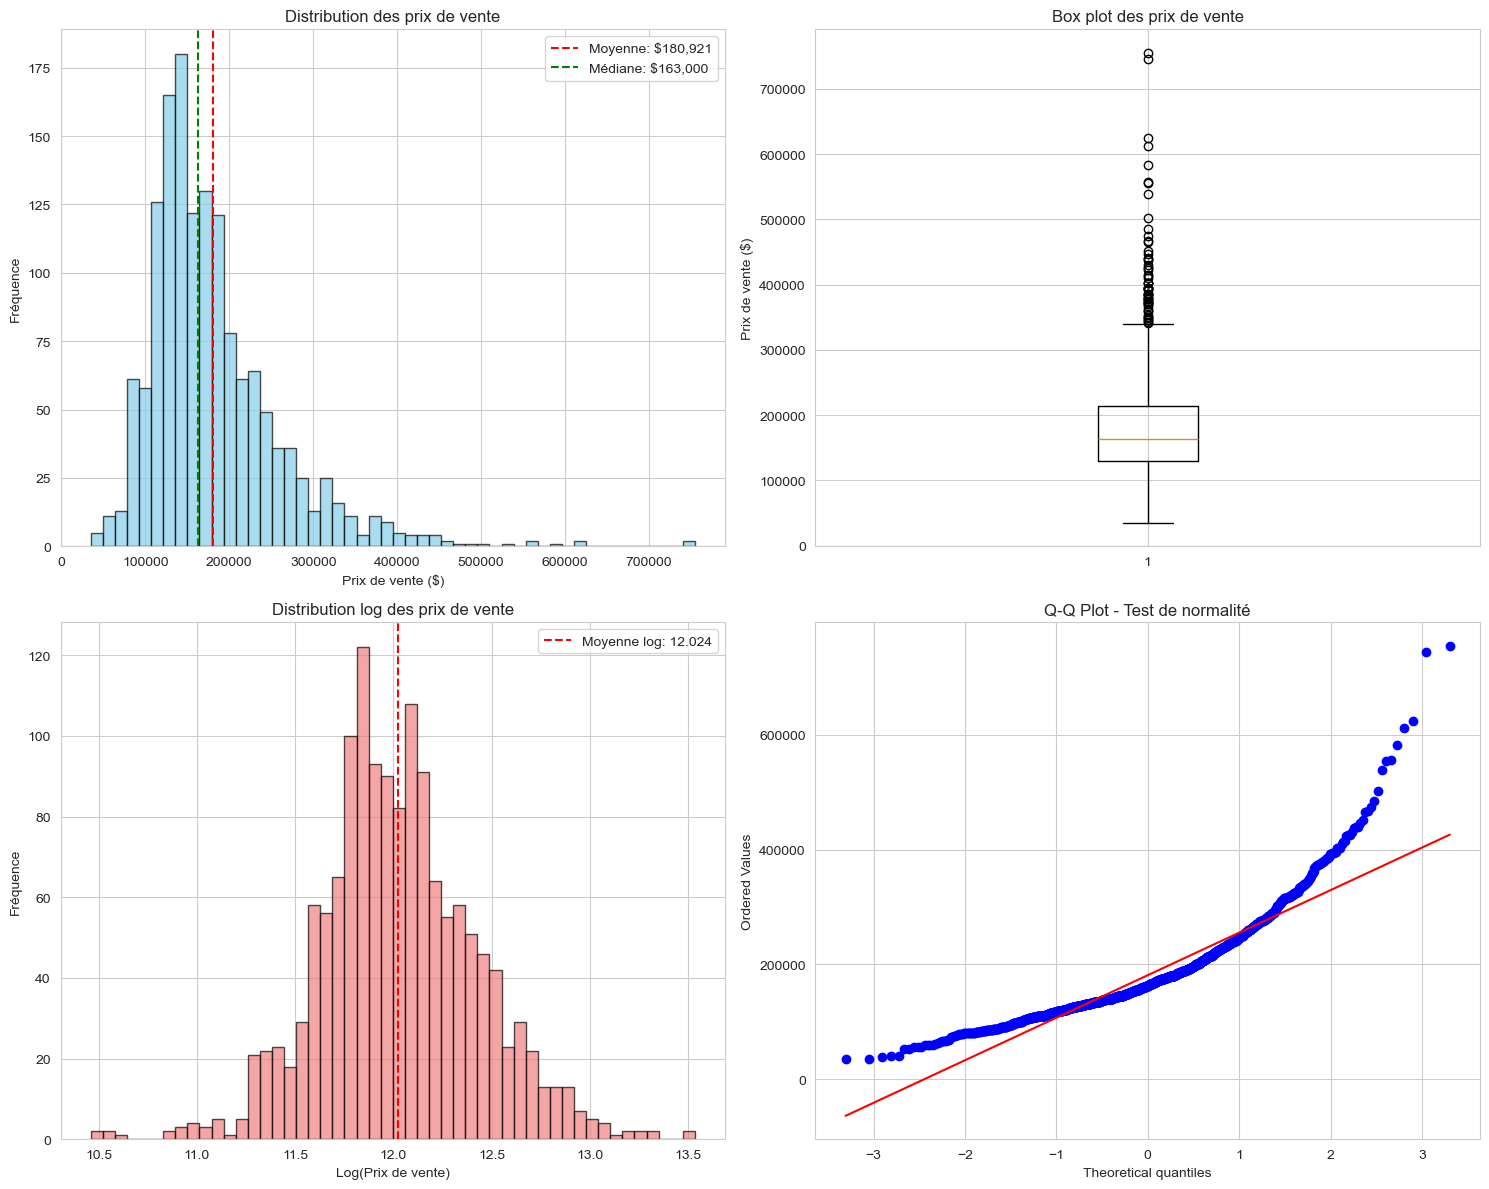

In [4]:
print("\n" + "="*60)
print("ANALYSE DE LA VARIABLE CIBLE - SALEPRICE")
print("="*60)

# Statistiques descriptives de SalePrice
print("STATISTIQUES DESCRIPTIVES DE SALEPRICE:")
print("-" * 40)
sale_price_stats = df['SalePrice'].describe()
print(sale_price_stats)
print(f"\nÉcart-type: ${df['SalePrice'].std():,.2f}")
print(f"Coefficient de variation: {(df['SalePrice'].std()/df['SalePrice'].mean())*100:.2f}%")
print(f"Asymétrie (Skewness): {skew(df['SalePrice']):.3f}")
print(f"Aplatissement (Kurtosis): {kurtosis(df['SalePrice']):.3f}")

# Visualisation de la distribution de SalePrice
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogramme
axes[0,0].hist(df['SalePrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['SalePrice'].mean(), color='red', linestyle='--', label=f'Moyenne: ${df["SalePrice"].mean():,.0f}')
axes[0,0].axvline(df['SalePrice'].median(), color='green', linestyle='--', label=f'Médiane: ${df["SalePrice"].median():,.0f}')
axes[0,0].set_xlabel('Prix de vente ($)')
axes[0,0].set_ylabel('Fréquence')
axes[0,0].set_title('Distribution des prix de vente')
axes[0,0].legend()

# Box plot
axes[0,1].boxplot(df['SalePrice'])
axes[0,1].set_ylabel('Prix de vente ($)')
axes[0,1].set_title('Box plot des prix de vente')

# Distribution log-normale
log_prices = np.log(df['SalePrice'])
axes[1,0].hist(log_prices, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].axvline(log_prices.mean(), color='red', linestyle='--', label=f'Moyenne log: {log_prices.mean():.3f}')
axes[1,0].set_xlabel('Log(Prix de vente)')
axes[1,0].set_ylabel('Fréquence')
axes[1,0].set_title('Distribution log des prix de vente')
axes[1,0].legend()

# Q-Q plot pour tester la normalité
stats.probplot(df['SalePrice'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Test de normalité')

plt.tight_layout()
plt.show()

## 4. IDENTIFICATION DES TYPES DE VARIABLES

In [5]:
print("\n" + "="*60)
print("CLASSIFICATION DES VARIABLES")
print("="*60)

# Séparation des variables numériques et catégoriques
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Enlever Id et SalePrice des variables explicatives
if 'Id' in numeric_columns:
    numeric_columns.remove('Id')
if 'SalePrice' in numeric_columns:
    numeric_columns.remove('SalePrice')

print(f"Variables numériques ({len(numeric_columns)}): ")
print(numeric_columns[:10], "..." if len(numeric_columns) > 10 else "")
print(f"\nVariables catégoriques ({len(categorical_columns)}): ")
print(categorical_columns[:10], "..." if len(categorical_columns) > 10 else "")

# Analyse plus détaillée des variables numériques
print(f"\nANALYSE DÉTAILLÉE DES VARIABLES NUMÉRIQUES:")
print("-" * 45)

numeric_analysis = pd.DataFrame({
    'Variable': numeric_columns,
    'Type': [str(df[col].dtype) for col in numeric_columns],
    'Valeurs_Uniques': [df[col].nunique() for col in numeric_columns],
    'Valeurs_Manquantes': [df[col].isnull().sum() for col in numeric_columns],
    'Min': [df[col].min() for col in numeric_columns],
    'Max': [df[col].max() for col in numeric_columns],
    'Moyenne': [df[col].mean() for col in numeric_columns],
    'Médiane': [df[col].median() for col in numeric_columns]
})

print(numeric_analysis.head(10))


CLASSIFICATION DES VARIABLES
Variables numériques (36): 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'] ...

Variables catégoriques (43): 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'] ...

ANALYSE DÉTAILLÉE DES VARIABLES NUMÉRIQUES:
---------------------------------------------
       Variable     Type  Valeurs_Uniques  Valeurs_Manquantes     Min  \
0    MSSubClass    int64               15                   0    20.0   
1   LotFrontage  float64              110                 259    21.0   
2       LotArea    int64             1073                   0  1300.0   
3   OverallQual    int64               10                   0     1.0   
4   OverallCond    int64                9                   0     1.0   
5     YearBuilt    int64              112                   0  1872.0   
6  YearRemodAdd    int64       

## 5. EXPLORATION DES VARIABLES NUMÉRIQUES


EXPLORATION DES VARIABLES NUMÉRIQUES
CORRÉLATIONS AVEC SALEPRICE (Top 15):
----------------------------------------
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


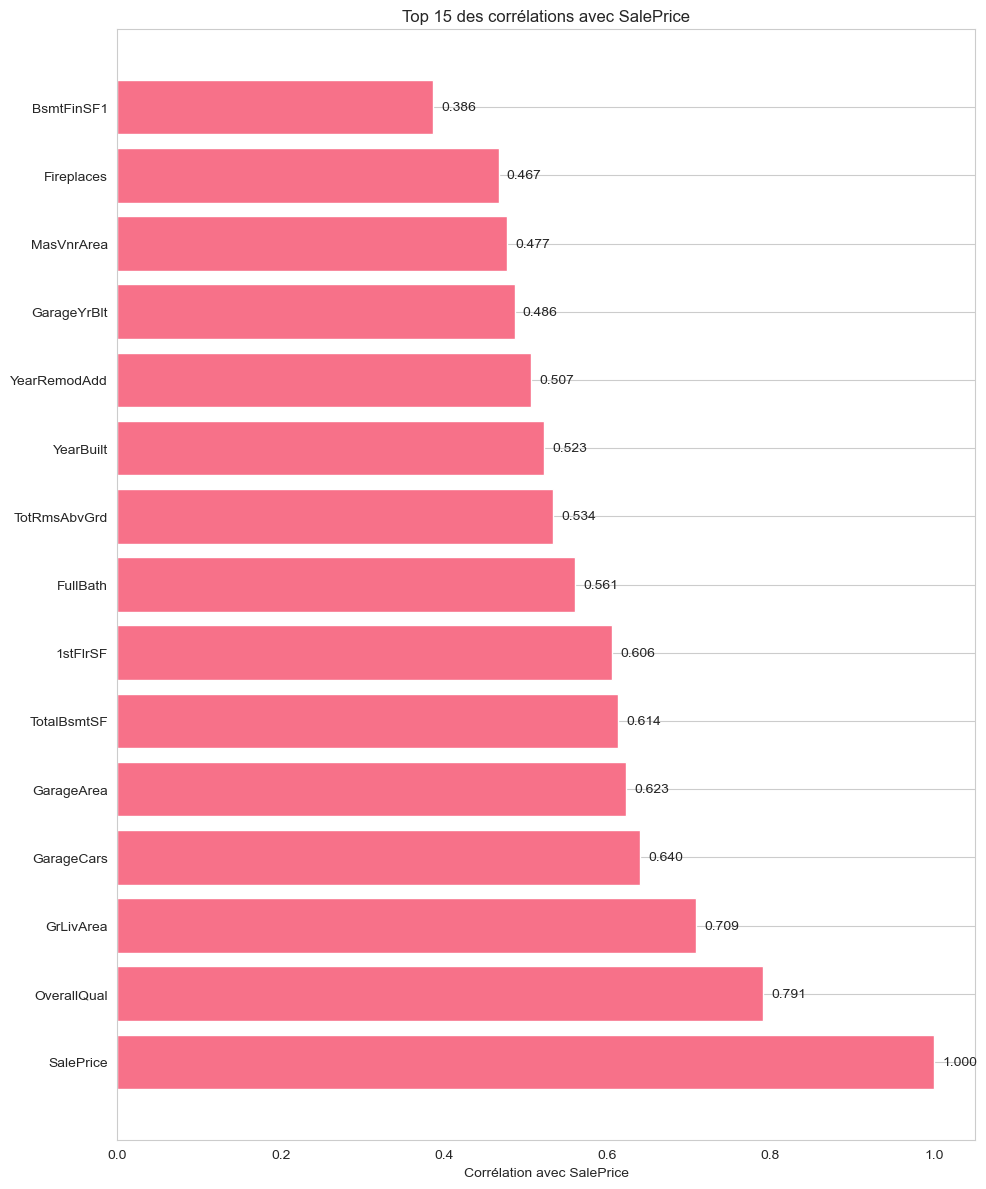


ANALYSE DES VARIABLES LES PLUS CORRÉLÉES:
---------------------------------------------


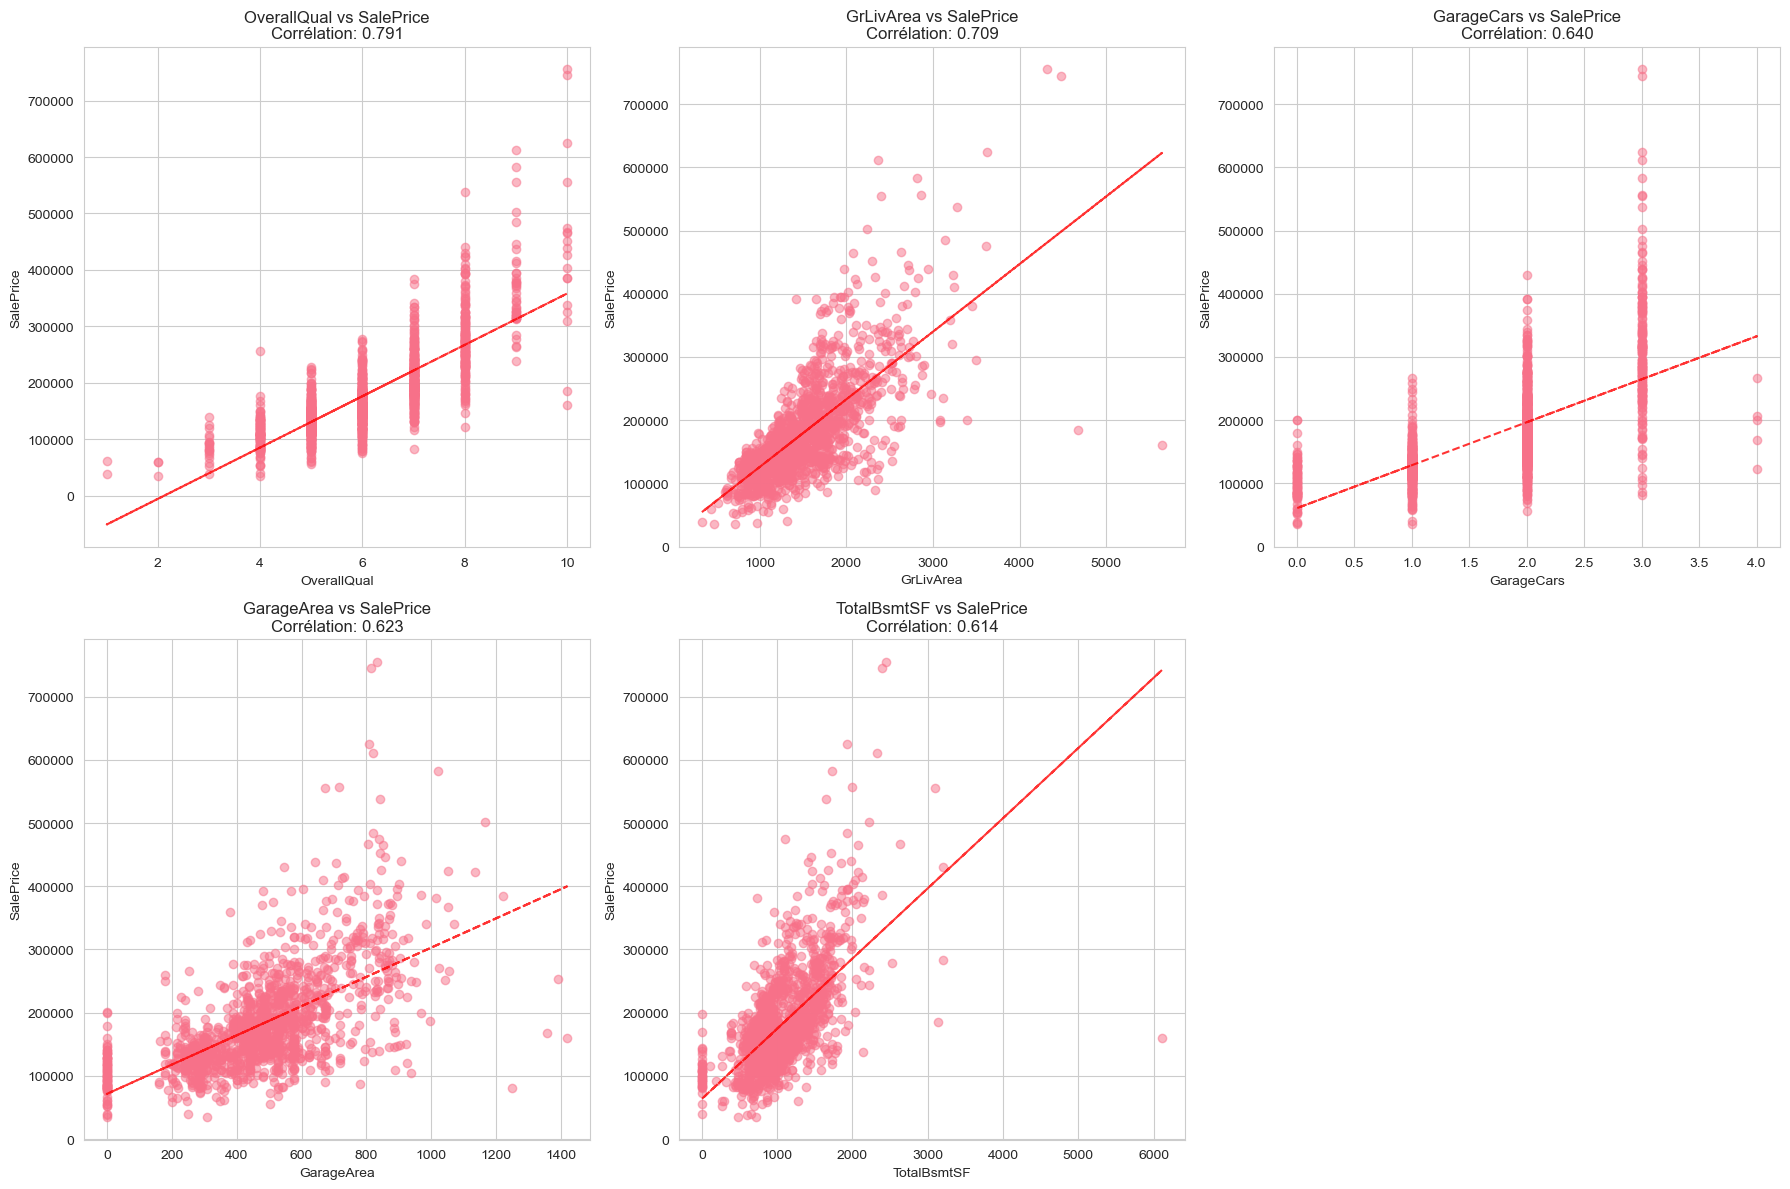


MATRICE DE CORRÉLATION - TOP VARIABLES:
------------------------------------------


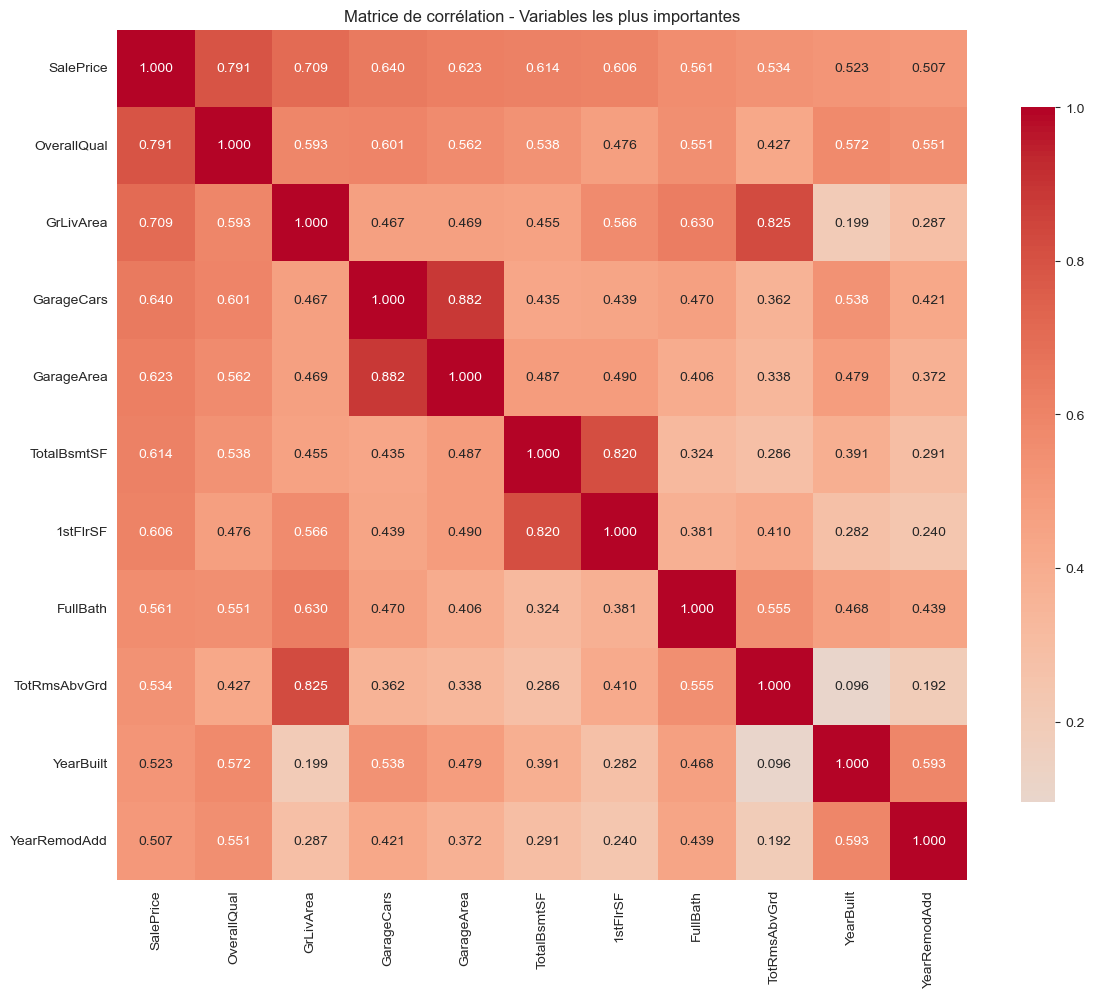

In [6]:
print("\n" + "="*60)
print("EXPLORATION DES VARIABLES NUMÉRIQUES")
print("="*60)

# Corrélation avec SalePrice
correlations = df[numeric_columns + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("CORRÉLATIONS AVEC SALEPRICE (Top 15):")
print("-" * 40)
print(correlations.head(15))

# Visualisation des corrélations
plt.figure(figsize=(10, 12))
top_corr = correlations.head(15)
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Corrélation avec SalePrice')
plt.title('Top 15 des corrélations avec SalePrice')
plt.grid(axis='x')
for i, v in enumerate(top_corr.values):
    plt.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
             ha='left' if v > 0 else 'right', va='center')
plt.tight_layout()
plt.show()

# Analyse des variables les plus corrélées
print("\nANALYSE DES VARIABLES LES PLUS CORRÉLÉES:")
print("-" * 45)

top_5_corr = correlations.head(6)[1:]  # Exclure SalePrice elle-même
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(top_5_corr.index):
    axes[i].scatter(df[var], df['SalePrice'], alpha=0.5)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{var} vs SalePrice\nCorrélation: {correlations[var]:.3f}')
    
    # Ligne de régression
    z = np.polyfit(df[var].dropna(), df.loc[df[var].notna(), 'SalePrice'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[var], p(df[var]), "r--", alpha=0.8)

# Supprimer le dernier subplot s'il est vide
if len(top_5_corr) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Matrice de corrélation des variables numériques les plus importantes
print("\nMATRICE DE CORRÉLATION - TOP VARIABLES:")
print("-" * 42)

top_vars = ['SalePrice'] + list(correlations.head(11)[1:].index)
corr_matrix = df[top_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation - Variables les plus importantes')
plt.tight_layout()
plt.show()

## 6. EXPLORATION DES VARIABLES CATÉGORIQUES


EXPLORATION DES VARIABLES CATÉGORIQUES
ANALYSE DES VARIABLES CATÉGORIQUES:
--------------------------------------
       Variable  Valeurs_Uniques  Valeurs_Manquantes    Mode  Fréq_Mode
0      MSZoning                5                   0      RL       1151
1        Street                2                   0    Pave       1454
2         Alley                2                1369    Grvl         50
3      LotShape                4                   0     Reg        925
4   LandContour                4                   0     Lvl       1311
5     Utilities                2                   0  AllPub       1459
6     LotConfig                5                   0  Inside       1052
7     LandSlope                3                   0     Gtl       1382
8  Neighborhood               25                   0   NAmes        225
9    Condition1                9                   0    Norm       1260

IMPACT DES VARIABLES CATÉGORIQUES SUR LE PRIX:
---------------------------------------------

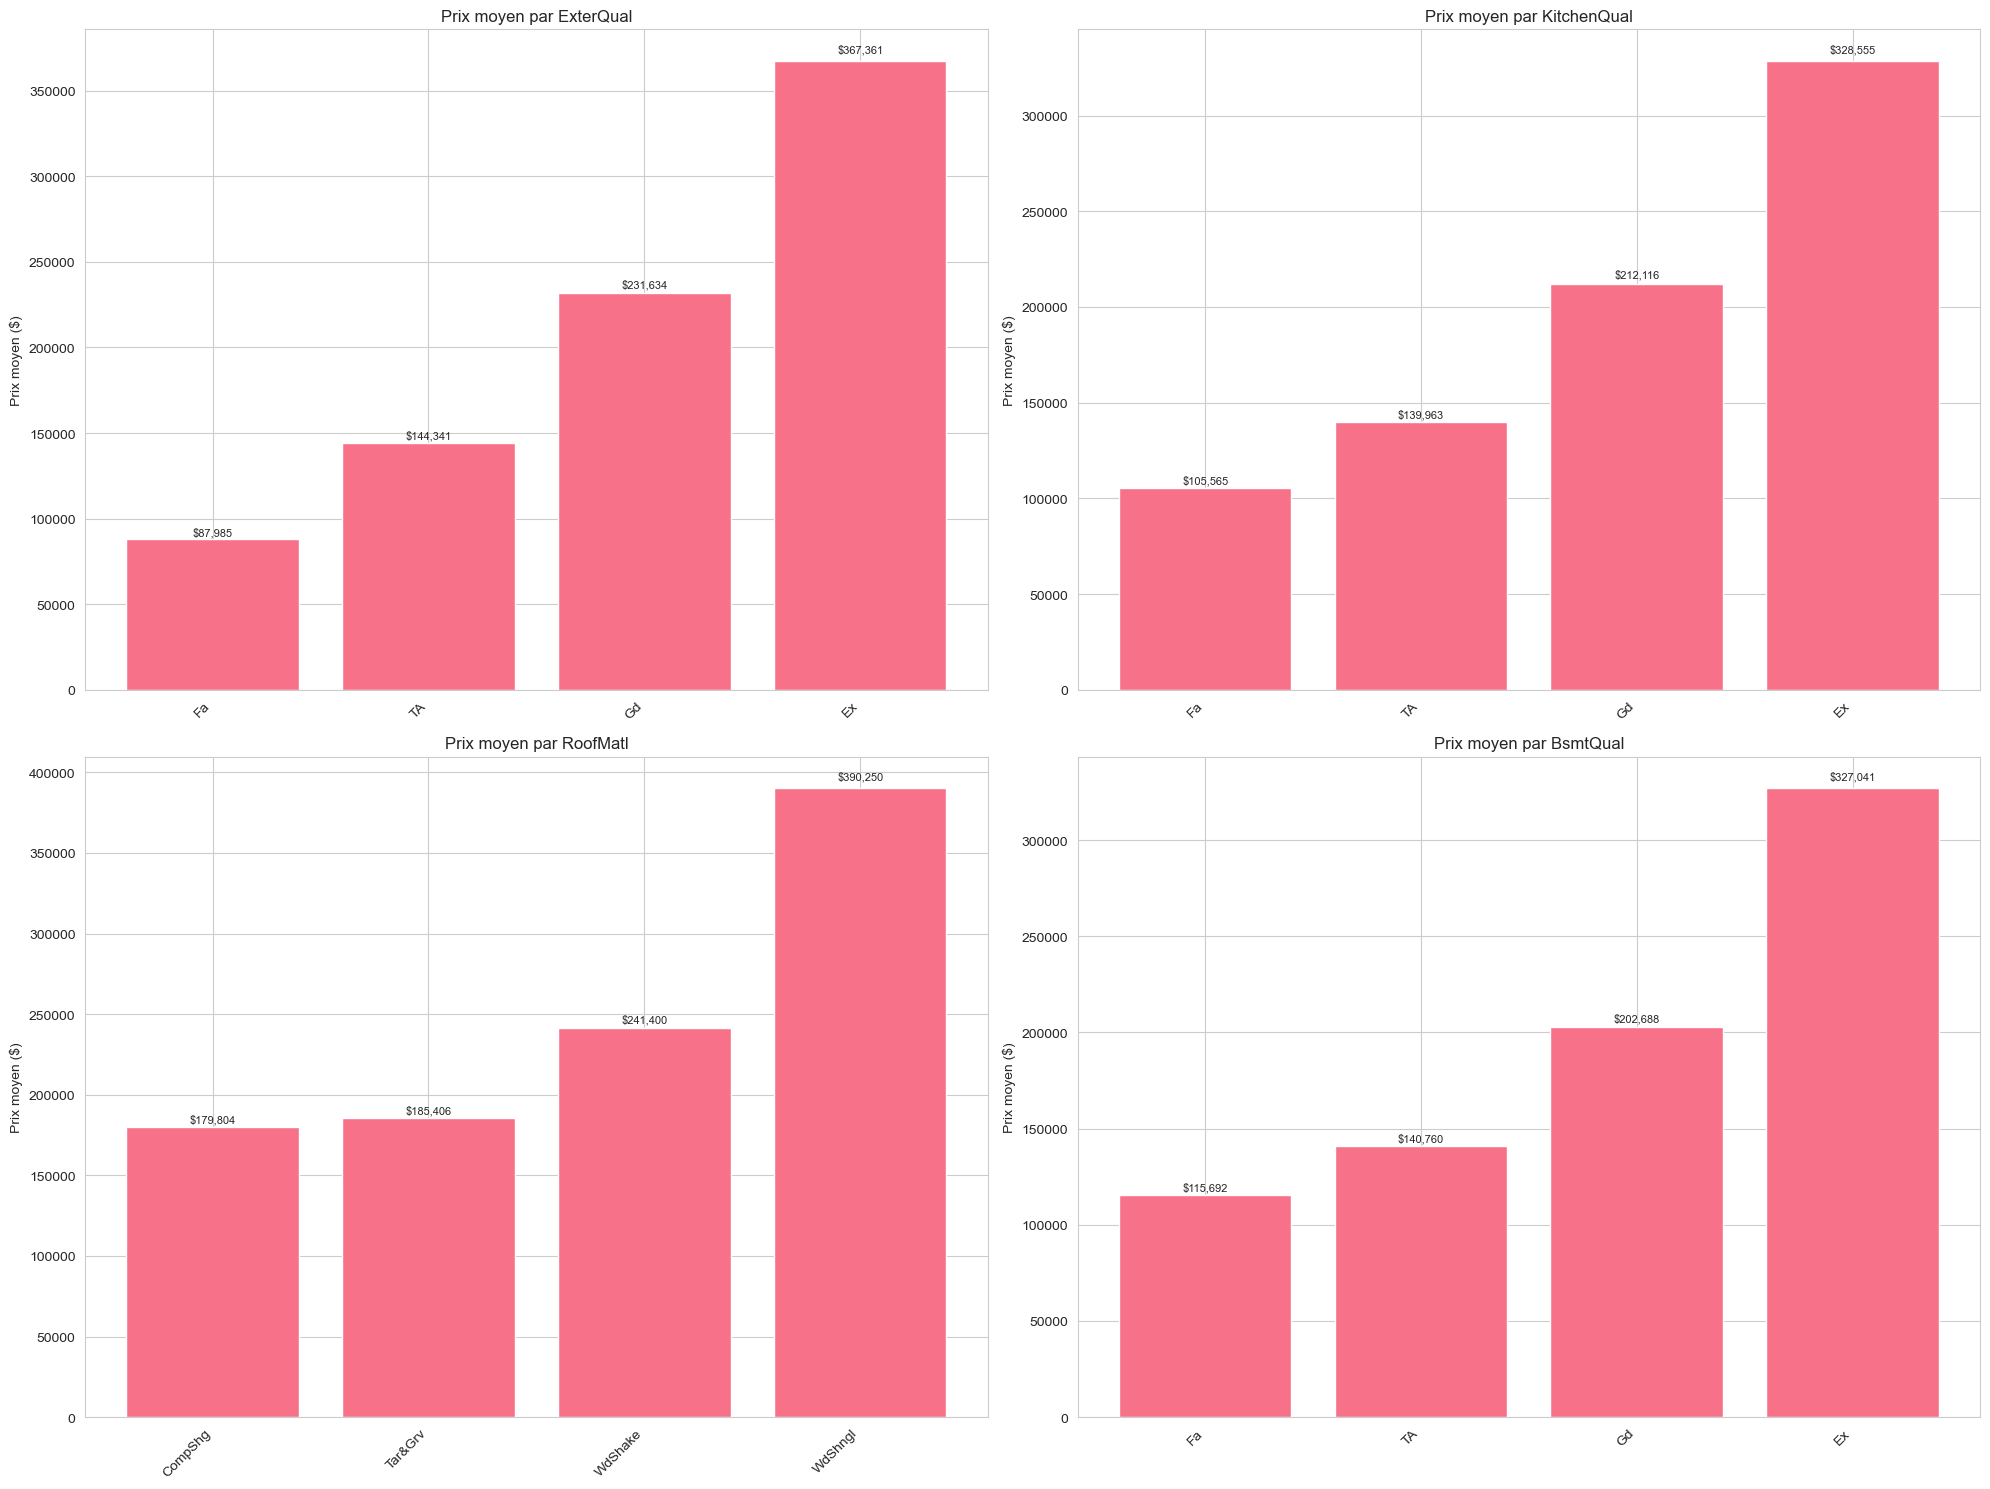

In [7]:
print("\n" + "="*60)
print("EXPLORATION DES VARIABLES CATÉGORIQUES")
print("="*60)

# Analyse des variables catégoriques
categorical_analysis = pd.DataFrame({
    'Variable': categorical_columns,
    'Valeurs_Uniques': [df[col].nunique() for col in categorical_columns],
    'Valeurs_Manquantes': [df[col].isnull().sum() for col in categorical_columns],
    'Mode': [df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A' for col in categorical_columns],
    'Fréq_Mode': [df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0 for col in categorical_columns]
})

print("ANALYSE DES VARIABLES CATÉGORIQUES:")
print("-" * 38)
print(categorical_analysis.head(10))

# Variables catégoriques avec le plus d'impact sur le prix
print("\nIMPACT DES VARIABLES CATÉGORIQUES SUR LE PRIX:")
print("-" * 48)

categorical_impact = {}
for col in categorical_columns:
    if df[col].notna().sum() > 0:  # Seulement si la variable a des valeurs non-null
        grouped = df.groupby(col)['SalePrice'].agg(['mean', 'count']).reset_index()
        grouped = grouped[grouped['count'] >= 5]  # Au moins 5 observations
        if len(grouped) > 1:
            price_variance = grouped['mean'].var()
            categorical_impact[col] = price_variance

impact_sorted = sorted(categorical_impact.items(), key=lambda x: x[1], reverse=True)
print("Variables avec le plus d'impact sur le prix (variance des moyennes):")
for var, impact in impact_sorted[:10]:
    print(f"{var}: {impact:,.0f}")

# Visualisation de l'impact des principales variables catégoriques
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

top_categorical = [var for var, _ in impact_sorted[:4]]

for i, var in enumerate(top_categorical):
    if var in df.columns:
        # Calculer les moyennes par catégorie
        grouped = df.groupby(var)['SalePrice'].agg(['mean', 'count']).reset_index()
        grouped = grouped[grouped['count'] >= 5].sort_values('mean', ascending=True)
        
        bars = axes[i].bar(range(len(grouped)), grouped['mean'])
        axes[i].set_xticks(range(len(grouped)))
        axes[i].set_xticklabels(grouped[var], rotation=45, ha='right')
        axes[i].set_ylabel('Prix moyen ($)')
        axes[i].set_title(f'Prix moyen par {var}')
        
        # Ajouter les valeurs sur les barres
        for j, bar in enumerate(bars):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'${height:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## 7. ANALYSE DES QUARTIERS (NEIGHBORHOOD)


ANALYSE SPÉCIFIQUE DES QUARTIERS
STATISTIQUES PAR QUARTIER (Top 10):
-----------------------------------
              Prix_Moyen  Prix_Médian  Nb_Ventes  Écart_Type
Neighborhood                                                
NoRidge        335295.32     301500.0         41   121412.66
NridgHt        316270.62     315000.0         77    96392.54
StoneBr        310499.00     278000.0         25   112969.68
Timber         242247.45     228475.0         38    64845.65
Veenker        238772.73     218000.0         11    72369.32
Somerst        225379.84     225500.0         86    56177.56
ClearCr        212565.43     200250.0         28    50231.54
Crawfor        210624.73     200624.0         51    68866.40
CollgCr        197965.77     197200.0        150    51403.67
Blmngtn        194870.88     191000.0         17    30393.23


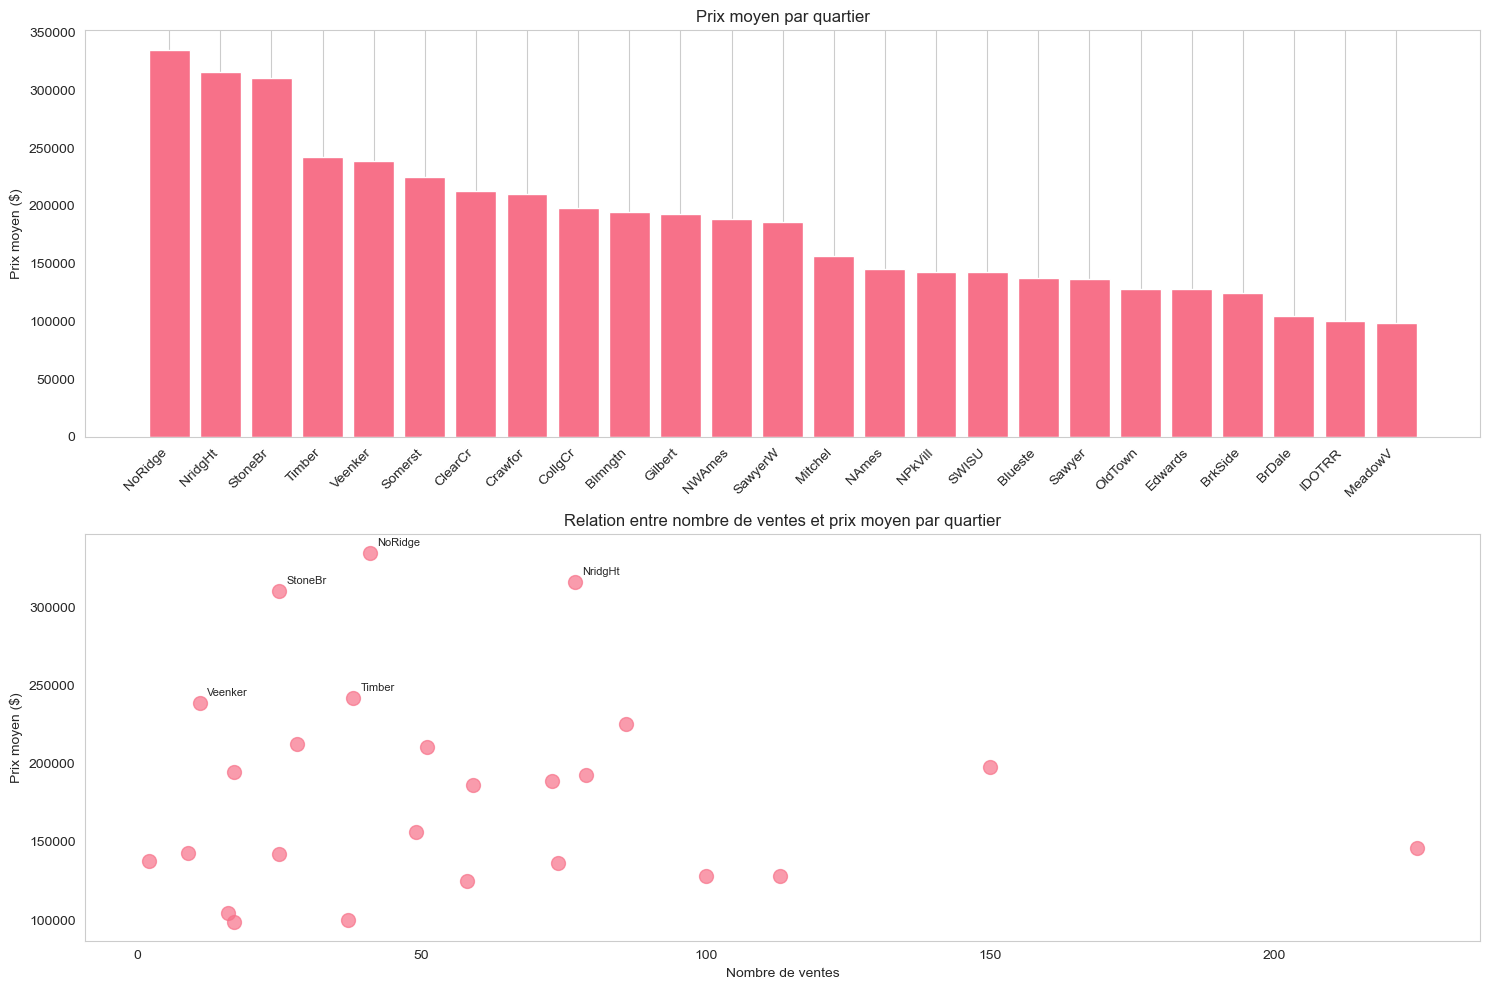

In [8]:
print("\n" + "="*60)
print("ANALYSE SPÉCIFIQUE DES QUARTIERS")
print("="*60)

neighborhood_stats = df.groupby('Neighborhood').agg({
    'SalePrice': ['mean', 'median', 'count', 'std']
}).round(2)

neighborhood_stats.columns = ['Prix_Moyen', 'Prix_Médian', 'Nb_Ventes', 'Écart_Type']
neighborhood_stats = neighborhood_stats.sort_values('Prix_Moyen', ascending=False)

print("STATISTIQUES PAR QUARTIER (Top 10):")
print("-" * 35)
print(neighborhood_stats.head(10))

# Visualisation des quartiers
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
neighborhoods = neighborhood_stats.index
prices = neighborhood_stats['Prix_Moyen']
plt.bar(range(len(neighborhoods)), prices)
plt.xticks(range(len(neighborhoods)), neighborhoods, rotation=45, ha='right')
plt.ylabel('Prix moyen ($)')
plt.title('Prix moyen par quartier')
plt.grid(axis='y')

plt.subplot(2, 1, 2)
plt.scatter(neighborhood_stats['Nb_Ventes'], neighborhood_stats['Prix_Moyen'], 
           s=100, alpha=0.7)
plt.xlabel('Nombre de ventes')
plt.ylabel('Prix moyen ($)')
plt.title('Relation entre nombre de ventes et prix moyen par quartier')

# Annoter quelques points intéressants
for i, neighborhood in enumerate(neighborhood_stats.index[:5]):
    plt.annotate(neighborhood, 
                (neighborhood_stats.loc[neighborhood, 'Nb_Ventes'],
                 neighborhood_stats.loc[neighborhood, 'Prix_Moyen']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.grid()
plt.tight_layout()
plt.show()

## 8. ANALYSE TEMPORELLE


ANALYSE TEMPORELLE DES VENTES
ÉVOLUTION ANNUELLE:
--------------------
        Prix_Moyen  Prix_Médian  Nb_Ventes
YrSold                                    
2006     182549.46     163995.0        314
2007     186063.15     167000.0        329
2008     177360.84     164000.0        304
2009     179432.10     162000.0        338
2010     177393.67     155000.0        175


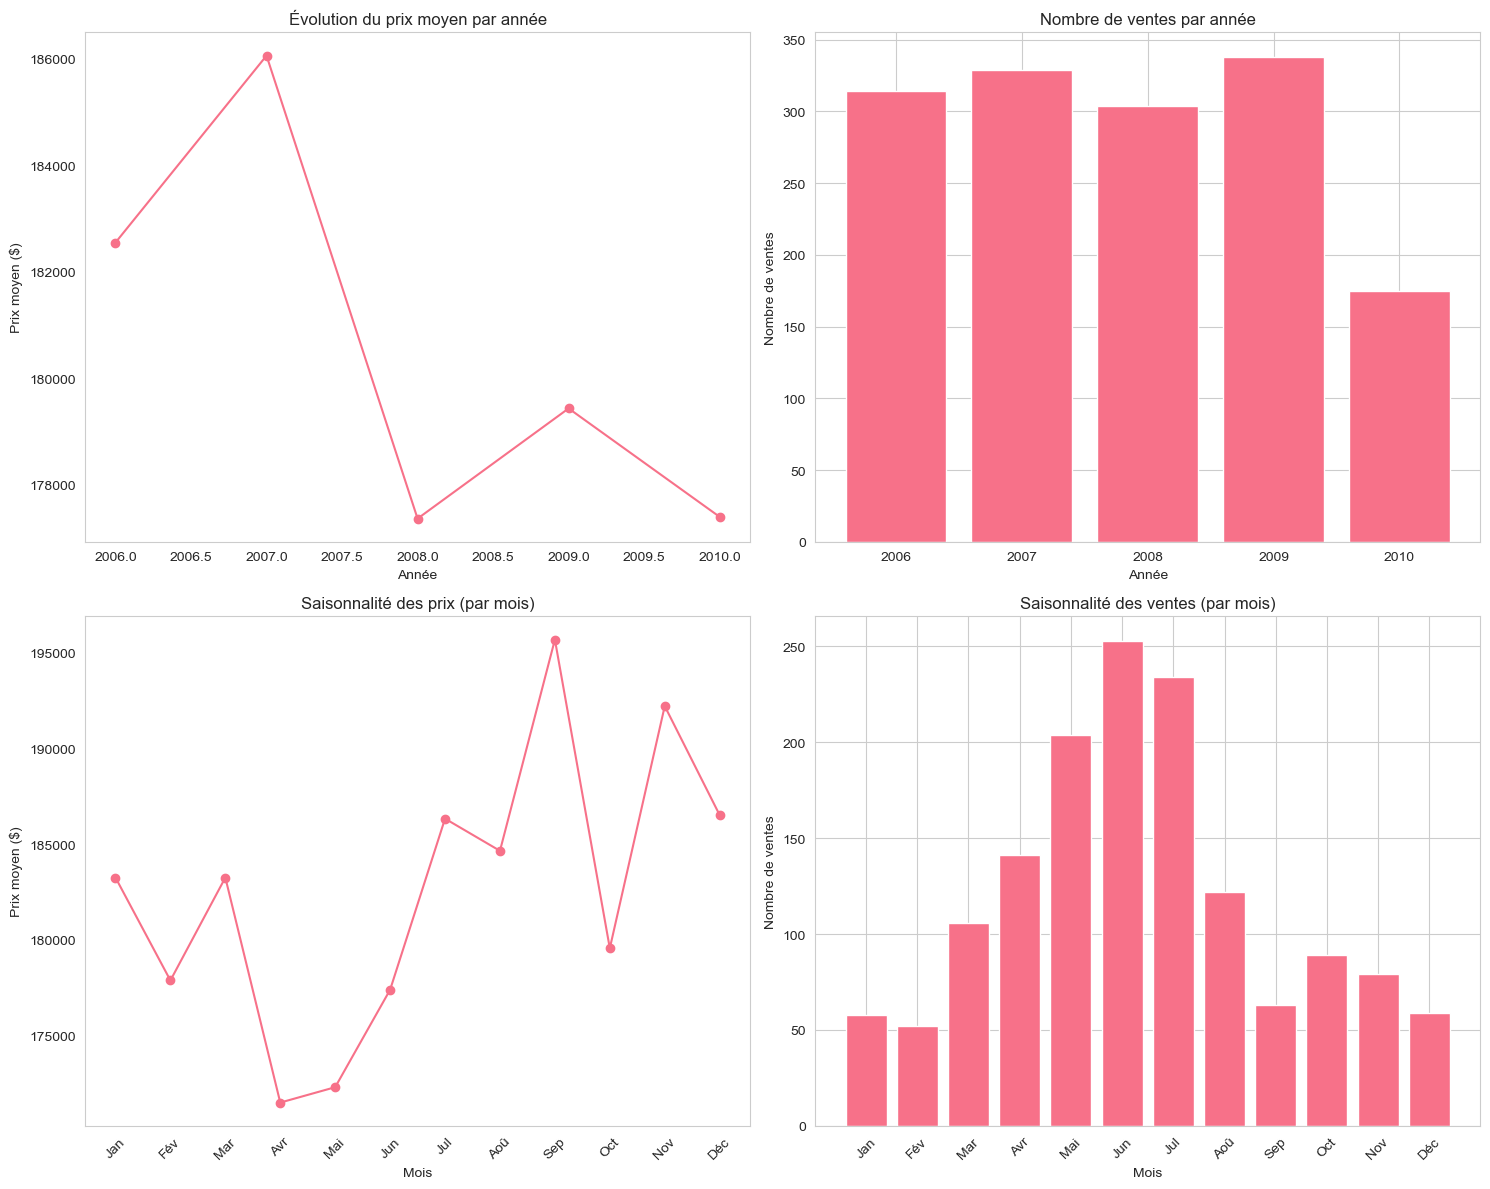

In [9]:
print("\n" + "="*60)
print("ANALYSE TEMPORELLE DES VENTES")
print("="*60)

# Évolution des prix par année
yearly_sales = df.groupby('YrSold').agg({
    'SalePrice': ['mean', 'median', 'count']
}).round(2)
yearly_sales.columns = ['Prix_Moyen', 'Prix_Médian', 'Nb_Ventes']

print("ÉVOLUTION ANNUELLE:")
print("-" * 20)
print(yearly_sales)

# Évolution des prix par mois
monthly_sales = df.groupby('MoSold').agg({
    'SalePrice': ['mean', 'median', 'count']
}).round(2)
monthly_sales.columns = ['Prix_Moyen', 'Prix_Médian', 'Nb_Ventes']

# Visualisation temporelle
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Évolution annuelle
axes[0,0].plot(yearly_sales.index, yearly_sales['Prix_Moyen'], marker='o')
axes[0,0].set_xlabel('Année')
axes[0,0].set_ylabel('Prix moyen ($)')
axes[0,0].set_title('Évolution du prix moyen par année')
axes[0,0].grid()

# Nombre de ventes par année
axes[0,1].bar(yearly_sales.index, yearly_sales['Nb_Ventes'])
axes[0,1].set_xlabel('Année')
axes[0,1].set_ylabel('Nombre de ventes')
axes[0,1].set_title('Nombre de ventes par année')

# Saisonnalité mensuelle
mois_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
               'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
axes[1,0].plot(monthly_sales.index, monthly_sales['Prix_Moyen'], marker='o')
axes[1,0].set_xlabel('Mois')
axes[1,0].set_ylabel('Prix moyen ($)')
axes[1,0].set_title('Saisonnalité des prix (par mois)')
axes[1,0].set_xticks(range(1, 13))
axes[1,0].set_xticklabels(mois_labels, rotation=45)
axes[1,0].grid()

# Nombre de ventes par mois
axes[1,1].bar(monthly_sales.index, monthly_sales['Nb_Ventes'])
axes[1,1].set_xlabel('Mois')
axes[1,1].set_ylabel('Nombre de ventes')
axes[1,1].set_title('Saisonnalité des ventes (par mois)')
axes[1,1].set_xticks(range(1, 13))
axes[1,1].set_xticklabels(mois_labels, rotation=45)

plt.tight_layout()
plt.show()

## 9. ANALYSE DE LA QUALITÉ ET DE L'ÉTAT


ANALYSE DE LA QUALITÉ ET DE L'ÉTAT


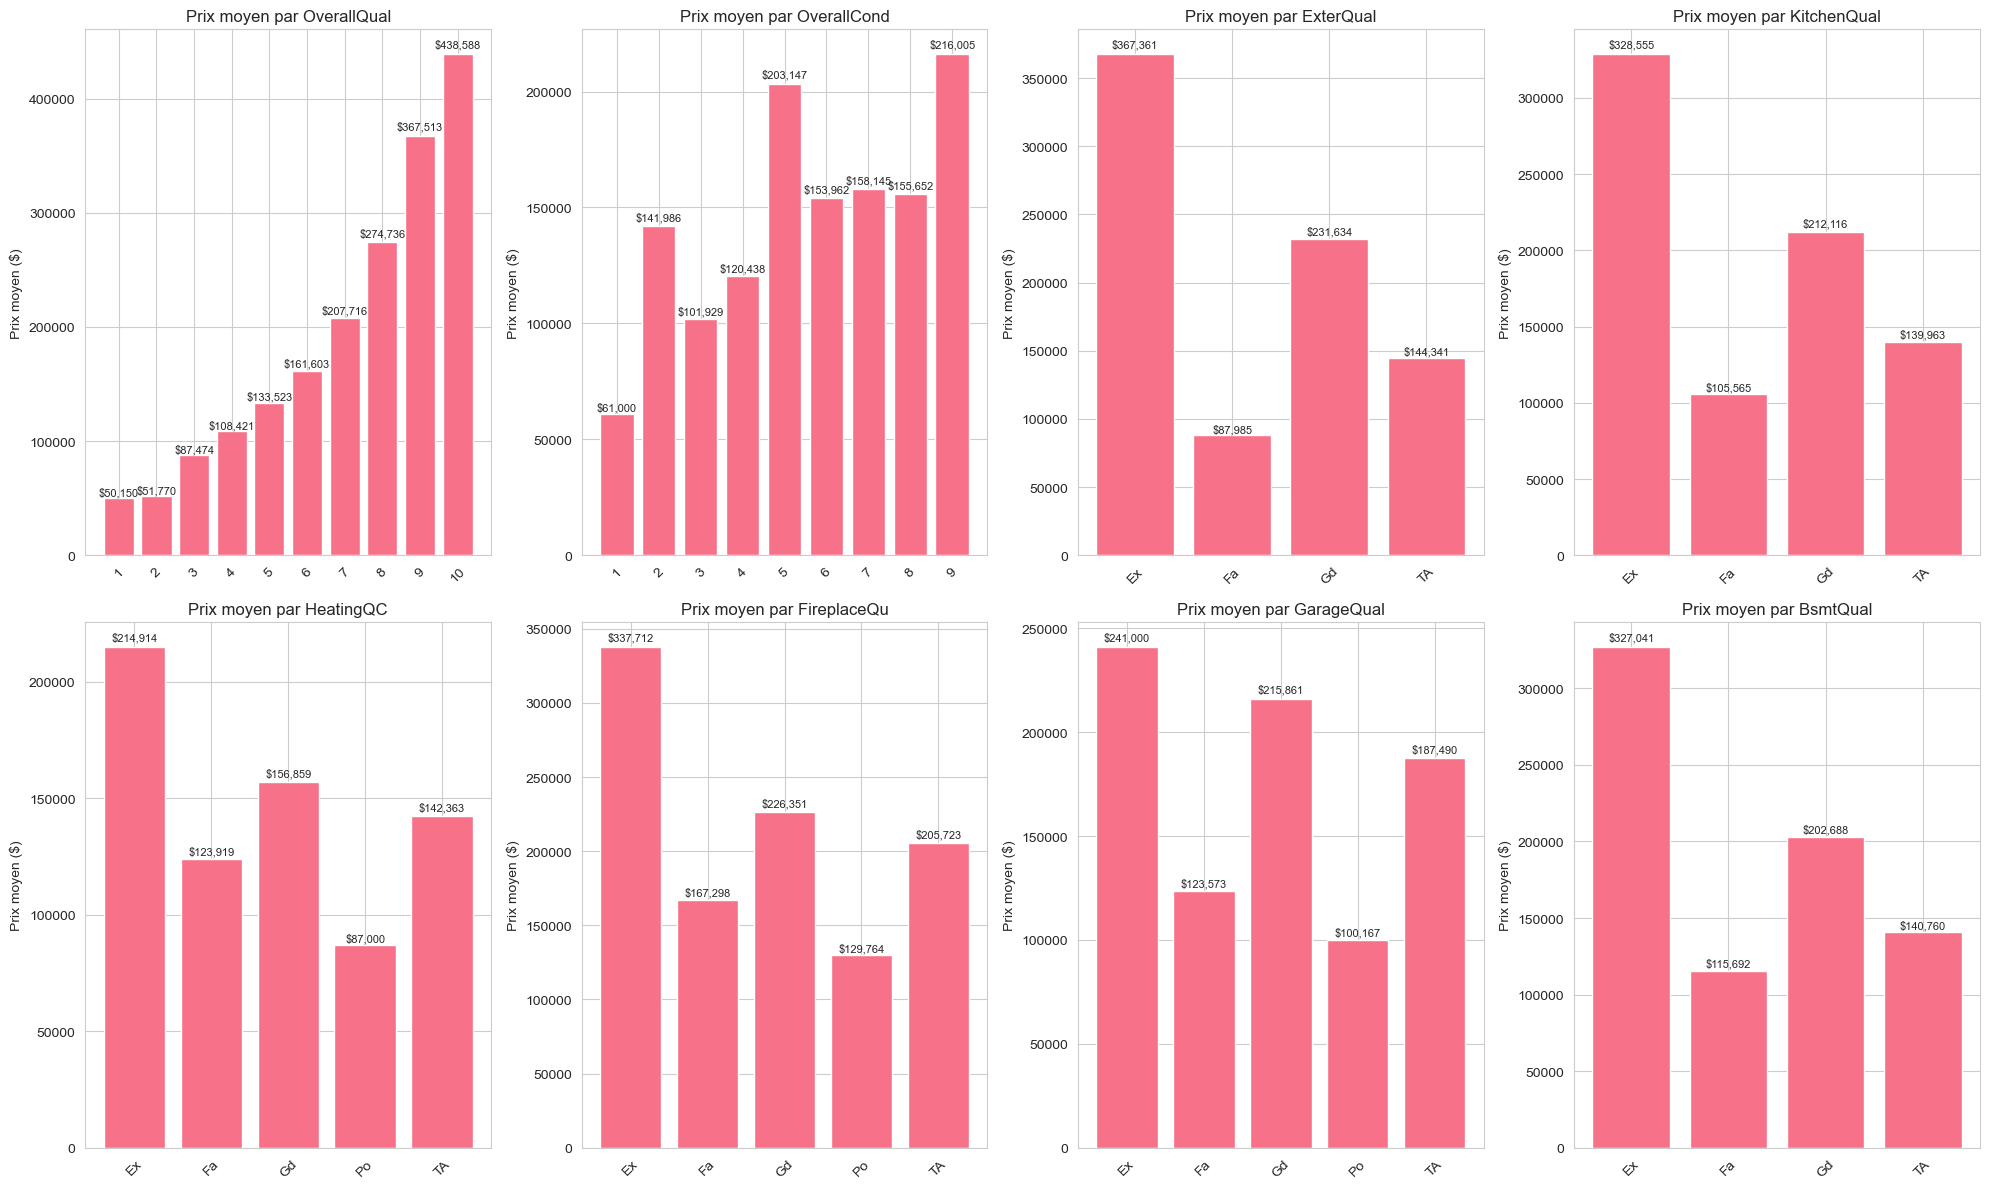

In [10]:
print("\n" + "="*60)
print("ANALYSE DE LA QUALITÉ ET DE L'ÉTAT")
print("="*60)

# Variables de qualité
quality_vars = ['OverallQual', 'OverallCond', 'ExterQual', 'KitchenQual', 
                'HeatingQC', 'FireplaceQu', 'GarageQual', 'BsmtQual']

# Conversion des variables qualitatives en numériques pour analyse
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

for i, var in enumerate(quality_vars):
    if var in df.columns:
        if var in ['OverallQual', 'OverallCond']:
            # Ces variables sont déjà numériques
            grouped = df.groupby(var)['SalePrice'].mean()
        else:
            # Convertir les variables qualitatives
            if df[var].notna().sum() > 0:
                grouped = df.groupby(var)['SalePrice'].mean()
            else:
                continue
        
        if len(grouped) > 0:
            bars = axes[i].bar(range(len(grouped)), grouped.values)
            axes[i].set_xticks(range(len(grouped)))
            axes[i].set_xticklabels(grouped.index, rotation=45)
            axes[i].set_ylabel('Prix moyen ($)')
            axes[i].set_title(f'Prix moyen par {var}')
            
            # Ajouter les valeurs sur les barres
            for j, bar in enumerate(bars):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                            f'${height:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## 10. ANALYSE DES SURFACES ET DIMENSIONS


ANALYSE DES SURFACES ET DIMENSIONS
CORRÉLATIONS DES SURFACES AVEC LE PRIX:
------------------------------------------
SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
2ndFlrSF       0.319334
LotArea        0.263843
Name: SalePrice, dtype: float64


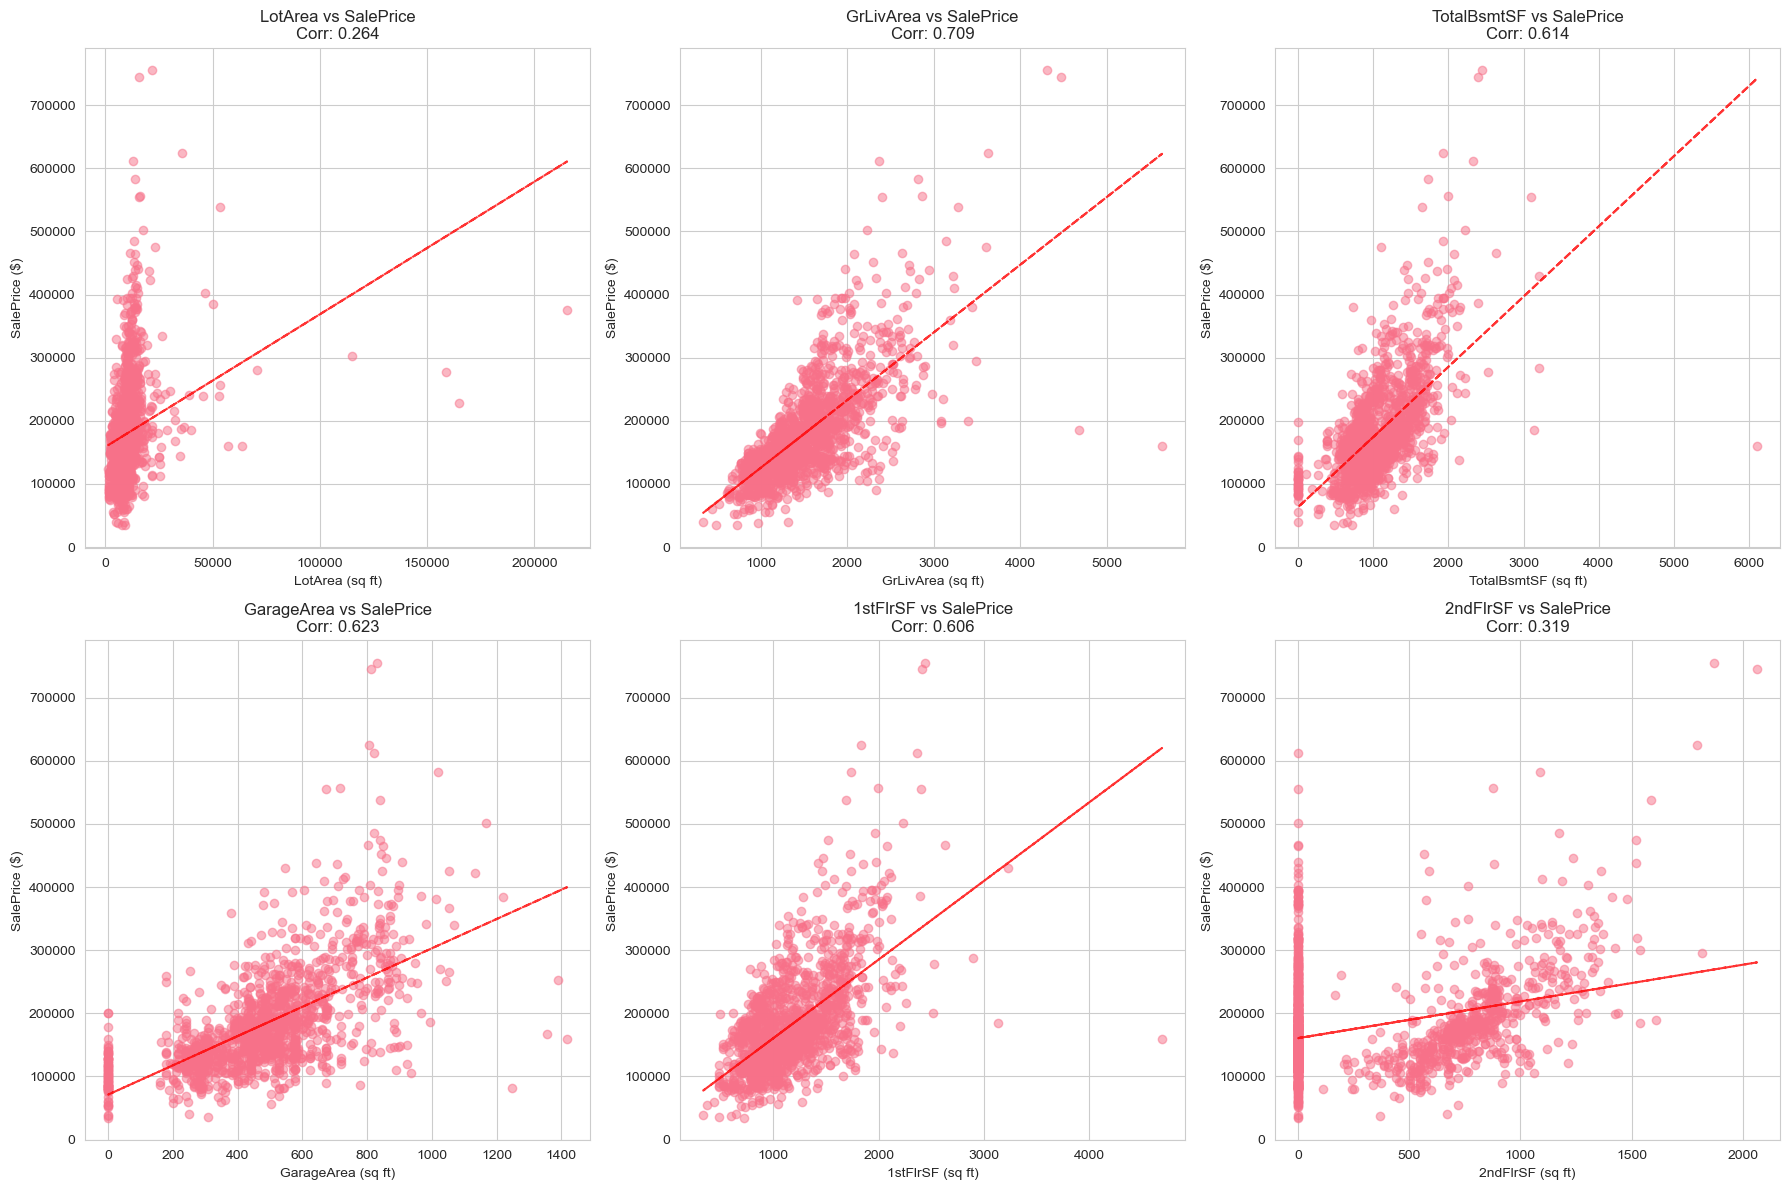

In [11]:
print("\n" + "="*60)
print("ANALYSE DES SURFACES ET DIMENSIONS")
print("="*60)

# Variables de surface importantes
surface_vars = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 
                '1stFlrSF', '2ndFlrSF']

# Corrélations avec le prix
surface_corr = df[surface_vars + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("CORRÉLATIONS DES SURFACES AVEC LE PRIX:")
print("-" * 42)
print(surface_corr)

# Visualisation des relations surface-prix
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(surface_vars):
    axes[i].scatter(df[var], df['SalePrice'], alpha=0.5)
    axes[i].set_xlabel(f'{var} (sq ft)')
    axes[i].set_ylabel('SalePrice ($)')
    axes[i].set_title(f'{var} vs SalePrice\nCorr: {surface_corr[var]:.3f}')
    
    # Ligne de régression
    valid_data = df[[var, 'SalePrice']].dropna()
    if len(valid_data) > 1:
        z = np.polyfit(valid_data[var], valid_data['SalePrice'], 1)
        p = np.poly1d(z)
        axes[i].plot(valid_data[var], p(valid_data[var]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

## 11. DÉTECTION DES VALEURS ABERRANTES


DÉTECTION DES VALEURS ABERRANTES
OUTLIERS POUR SALEPRICE:
Borne inférieure: $3,938
Borne supérieure: $340,038
Nombre d'outliers: 61 (4.2%)

Top 5 des prix les plus élevés:
        Id  SalePrice Neighborhood  GrLivArea  OverallQual
691    692     755000      NoRidge       4316           10
1182  1183     745000      NoRidge       4476           10
1169  1170     625000      NoRidge       3627           10
898    899     611657      NridgHt       2364            9
803    804     582933      NridgHt       2822            9


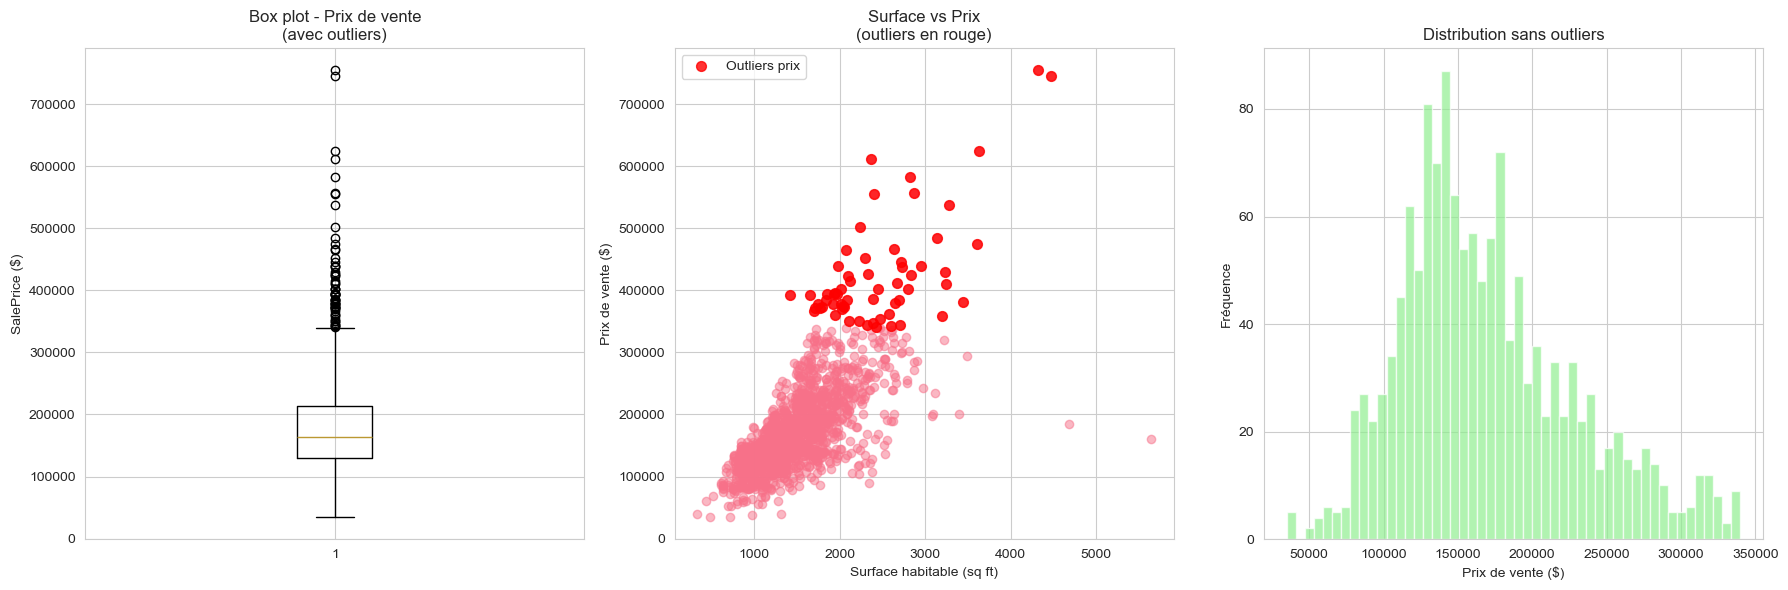

In [12]:
print("\n" + "="*60)
print("DÉTECTION DES VALEURS ABERRANTES")
print("="*60)

# Méthode IQR pour détecter les outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyse des outliers pour SalePrice
outliers_price, lower_price, upper_price = detect_outliers_iqr(df, 'SalePrice')
print(f"OUTLIERS POUR SALEPRICE:")
print(f"Borne inférieure: ${lower_price:,.0f}")
print(f"Borne supérieure: ${upper_price:,.0f}")
print(f"Nombre d'outliers: {len(outliers_price)} ({len(outliers_price)/len(df)*100:.1f}%)")

# Top outliers
if len(outliers_price) > 0:
    print(f"\nTop 5 des prix les plus élevés:")
    top_outliers = outliers_price.nlargest(5, 'SalePrice')[['Id', 'SalePrice', 'Neighborhood', 'GrLivArea', 'OverallQual']]
    print(top_outliers)

# Visualisation des outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot avec outliers
axes[0].boxplot(df['SalePrice'])
axes[0].set_ylabel('SalePrice ($)')
axes[0].set_title('Box plot - Prix de vente\n(avec outliers)')

# Scatter plot GrLivArea vs SalePrice
axes[1].scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
if len(outliers_price) > 0:
    axes[1].scatter(outliers_price['GrLivArea'], outliers_price['SalePrice'], 
                   color='red', s=50, alpha=0.8, label='Outliers prix')
axes[1].set_xlabel('Surface habitable (sq ft)')
axes[1].set_ylabel('Prix de vente ($)')
axes[1].set_title('Surface vs Prix\n(outliers en rouge)')
axes[1].legend()

# Distribution sans outliers
df_no_outliers = df[~df.index.isin(outliers_price.index)]
axes[2].hist(df_no_outliers['SalePrice'], bins=50, alpha=0.7, color='lightgreen')
axes[2].set_xlabel('Prix de vente ($)')
axes[2].set_ylabel('Fréquence')
axes[2].set_title('Distribution sans outliers')

plt.tight_layout()
plt.show()

## 12. SYNTHÈSE ET INSIGHTS PRINCIPAUX

In [13]:
print("\n" + "="*60)
print("SYNTHÈSE ET INSIGHTS PRINCIPAUX")
print("="*60)

print("🏠 INSIGHTS CLÉS DE L'EXPLORATION:")
print("-" * 35)

print(f"\n📊 DONNÉES GÉNÉRALES:")
print(f"   • {df.shape[0]:,} maisons dans le dataset")
print(f"   • {df.shape[1]} variables au total")
print(f"   • {len(numeric_columns)} variables numériques, {len(categorical_columns)} catégoriques")
print(f"   • {len(missing_cols)} colonnes avec des valeurs manquantes")

print(f"\n💰 PRIX DE VENTE:")
print(f"   • Prix moyen: ${df['SalePrice'].mean():,.0f}")
print(f"   • Prix médian: ${df['SalePrice'].median():,.0f}")
print(f"   • Écart-type: ${df['SalePrice'].std():,.0f}")
print(f"   • Distribution asymétrique (skewness: {skew(df['SalePrice']):.2f})")

print(f"\n🔗 VARIABLES LES PLUS CORRÉLÉES AVEC LE PRIX:")
top_corr_vars = correlations.head(6)[1:]  # Exclure SalePrice
for var, corr in top_corr_vars.items():
    print(f"   • {var}: {corr:.3f}")

print(f"\n🏘️ QUARTIERS:")
best_neighborhood = neighborhood_stats.index[0]
worst_neighborhood = neighborhood_stats.index[-1]
print(f"   • Quartier le plus cher: {best_neighborhood} (${neighborhood_stats.loc[best_neighborhood, 'Prix_Moyen']:,.0f})")
print(f"   • Quartier le moins cher: {worst_neighborhood} (${neighborhood_stats.loc[worst_neighborhood, 'Prix_Moyen']:,.0f})")

print(f"\n📅 TENDANCES TEMPORELLES:")
prix_2006 = yearly_sales.loc[2006, 'Prix_Moyen'] if 2006 in yearly_sales.index else 0
prix_2010 = yearly_sales.loc[2010, 'Prix_Moyen'] if 2010 in yearly_sales.index else 0
print(f"   • Prix moyen 2006: ${prix_2006:,.0f}")
print(f"   • Prix moyen 2010: ${prix_2010:,.0f}")
if prix_2006 > 0 and prix_2010 > 0:
    evolution = ((prix_2010 - prix_2006) / prix_2006) * 100
    print(f"   • Évolution 2006-2010: {evolution:+.1f}%")

mois_plus_cher = monthly_sales.idxmax()['Prix_Moyen']
mois_moins_cher = monthly_sales.idxmin()['Prix_Moyen']
print(f"   • Mois le plus cher: {mois_labels[mois_plus_cher-1]} (${monthly_sales.loc[mois_plus_cher, 'Prix_Moyen']:,.0f})")
print(f"   • Mois le moins cher: {mois_labels[mois_moins_cher-1]} (${monthly_sales.loc[mois_moins_cher, 'Prix_Moyen']:,.0f})")

print(f"\n⚠️ DONNÉES MANQUANTES À TRAITER:")
for col in missing_cols.head(5)['Colonnes']:
    pct = missing_cols[missing_cols['Colonnes'] == col]['Pourcentage'].iloc[0]
    print(f"   • {col}: {pct:.1f}%")

print(f"\n🎯 RECOMMANDATIONS POUR LA MODÉLISATION:")
print("   • Appliquer une transformation logarithmique à SalePrice")
print("   • Traiter les valeurs manquantes selon leur nature (NA vs vraiment manquant)")
print("   • Considérer la suppression ou le traitement spécial des outliers")
print("   • Créer des variables dérivées (âge de la maison, surface totale, etc.)")
print("   • Encoder les variables catégoriques appropriément")
print("   • Utiliser la validation croisée pour éviter le surapprentissage")

print(f"\n" + "="*60)
print("FIN DE L'EXPLORATION")
print("="*60)


SYNTHÈSE ET INSIGHTS PRINCIPAUX
🏠 INSIGHTS CLÉS DE L'EXPLORATION:
-----------------------------------

📊 DONNÉES GÉNÉRALES:
   • 1,460 maisons dans le dataset
   • 81 variables au total
   • 36 variables numériques, 43 catégoriques
   • 19 colonnes avec des valeurs manquantes

💰 PRIX DE VENTE:
   • Prix moyen: $180,921
   • Prix médian: $163,000
   • Écart-type: $79,443
   • Distribution asymétrique (skewness: 1.88)

🔗 VARIABLES LES PLUS CORRÉLÉES AVEC LE PRIX:
   • OverallQual: 0.791
   • GrLivArea: 0.709
   • GarageCars: 0.640
   • GarageArea: 0.623
   • TotalBsmtSF: 0.614

🏘️ QUARTIERS:
   • Quartier le plus cher: NoRidge ($335,295)
   • Quartier le moins cher: MeadowV ($98,576)

📅 TENDANCES TEMPORELLES:
   • Prix moyen 2006: $182,549
   • Prix moyen 2010: $177,394
   • Évolution 2006-2010: -2.8%
   • Mois le plus cher: Sep ($195,683)
   • Mois le moins cher: Avr ($171,503)

⚠️ DONNÉES MANQUANTES À TRAITER:
   • PoolQC: 99.5%
   • MiscFeature: 96.3%
   • Alley: 93.8%
   • Fence: 80